In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Get rout data sets
drive.mount('/content/drive')
ruta_1 = '/content/drive/MyDrive/UU Notes/Data Science and Society/Project Data Science And Society/Data/Air quality/p10Sensor Corso 22 Marzo, Milan, Italy.csv'
ruta_2 = '/content/drive/MyDrive/UU Notes/Data Science and Society/Project Data Science And Society/Data/Air quality/p25Sensor Corso 22 Marzo, Milan, Italy.csv'

ruta_3 = '/content/drive/MyDrive/UU Notes/Data Science and Society/Project Data Science And Society/Data/Air quality/p10Sensor Piazza Sempione, Milan, Italy .csv'
ruta_4 = '/content/drive/MyDrive/UU Notes/Data Science and Society/Project Data Science And Society/Data/Air quality/p25Sensor Piazza Sempione, Milan, Italy.csv'

Mounted at /content/drive


In [3]:
df_corsop10 = pd.read_csv(ruta_1, parse_dates=['date'], dayfirst=True)
df_corsop25 = pd.read_csv(ruta_2, parse_dates=['date'], dayfirst=True)
df_corsop10['date'] = pd.to_datetime(df_corsop10['date'], format='%Y/%m/%d')
df_corsop25['date'] = pd.to_datetime(df_corsop25['date'], format='%Y/%m/%d')

df_sempione10 = pd.read_csv(ruta_3, parse_dates=['date'], dayfirst=True)
df_sempione25 = pd.read_csv(ruta_4, parse_dates=['date'], dayfirst=True)
df_sempione10['date'] = pd.to_datetime(df_sempione10['date'])
df_sempione25['date'] = pd.to_datetime(df_sempione25['date'])

<ipython-input-3-07db2ecbb496>:1: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S.%f%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corsop10 = pd.read_csv(ruta_1, parse_dates=['date'], dayfirst=True)
<ipython-input-3-07db2ecbb496>:2: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S.%f%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corsop25 = pd.read_csv(ruta_2, parse_dates=['date'], dayfirst=True)
<ipython-input-3-07db2ecbb496>:6: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S.%f%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_sempione10 = pd.read_csv(ruta_3, parse_dates=['date'], dayfirst=True)


In [4]:
df_corsop10.columns = ['date'] + ['pm10' + col for col in df_corsop10.columns if col != 'date']
df_corsop25.columns = ['date'] + ['pm25' + col for col in df_corsop25.columns if col != 'date']
df_corsop = pd.merge(df_corsop25, df_corsop10, how='inner', on='date')

df_sempione10.columns = ['date'] + ['pm10' + col for col in df_sempione10.columns if col != 'date']
df_sempione25.columns = ['date'] + ['pm25' + col for col in df_sempione25.columns if col != 'date']
df_sempione = pd.merge(df_sempione25, df_sempione10, how='inner', on='date')

In [5]:
df_corsop['month'] = df_corsop['date'].dt.month
df_corsop['year'] = df_corsop['date'].dt.year
df_corsop['day_of_week'] = df_corsop['date'].dt.day_name()
df_corsop['week_number'] = df_corsop['date'].dt.isocalendar().week

df_sempione['month'] = df_sempione['date'].dt.month
df_sempione['year'] = df_sempione['date'].dt.year
df_sempione['day_of_week'] = df_sempione['date'].dt.day_name()
df_sempione['week_number'] = df_sempione['date'].dt.isocalendar().week



# **Corso Station**

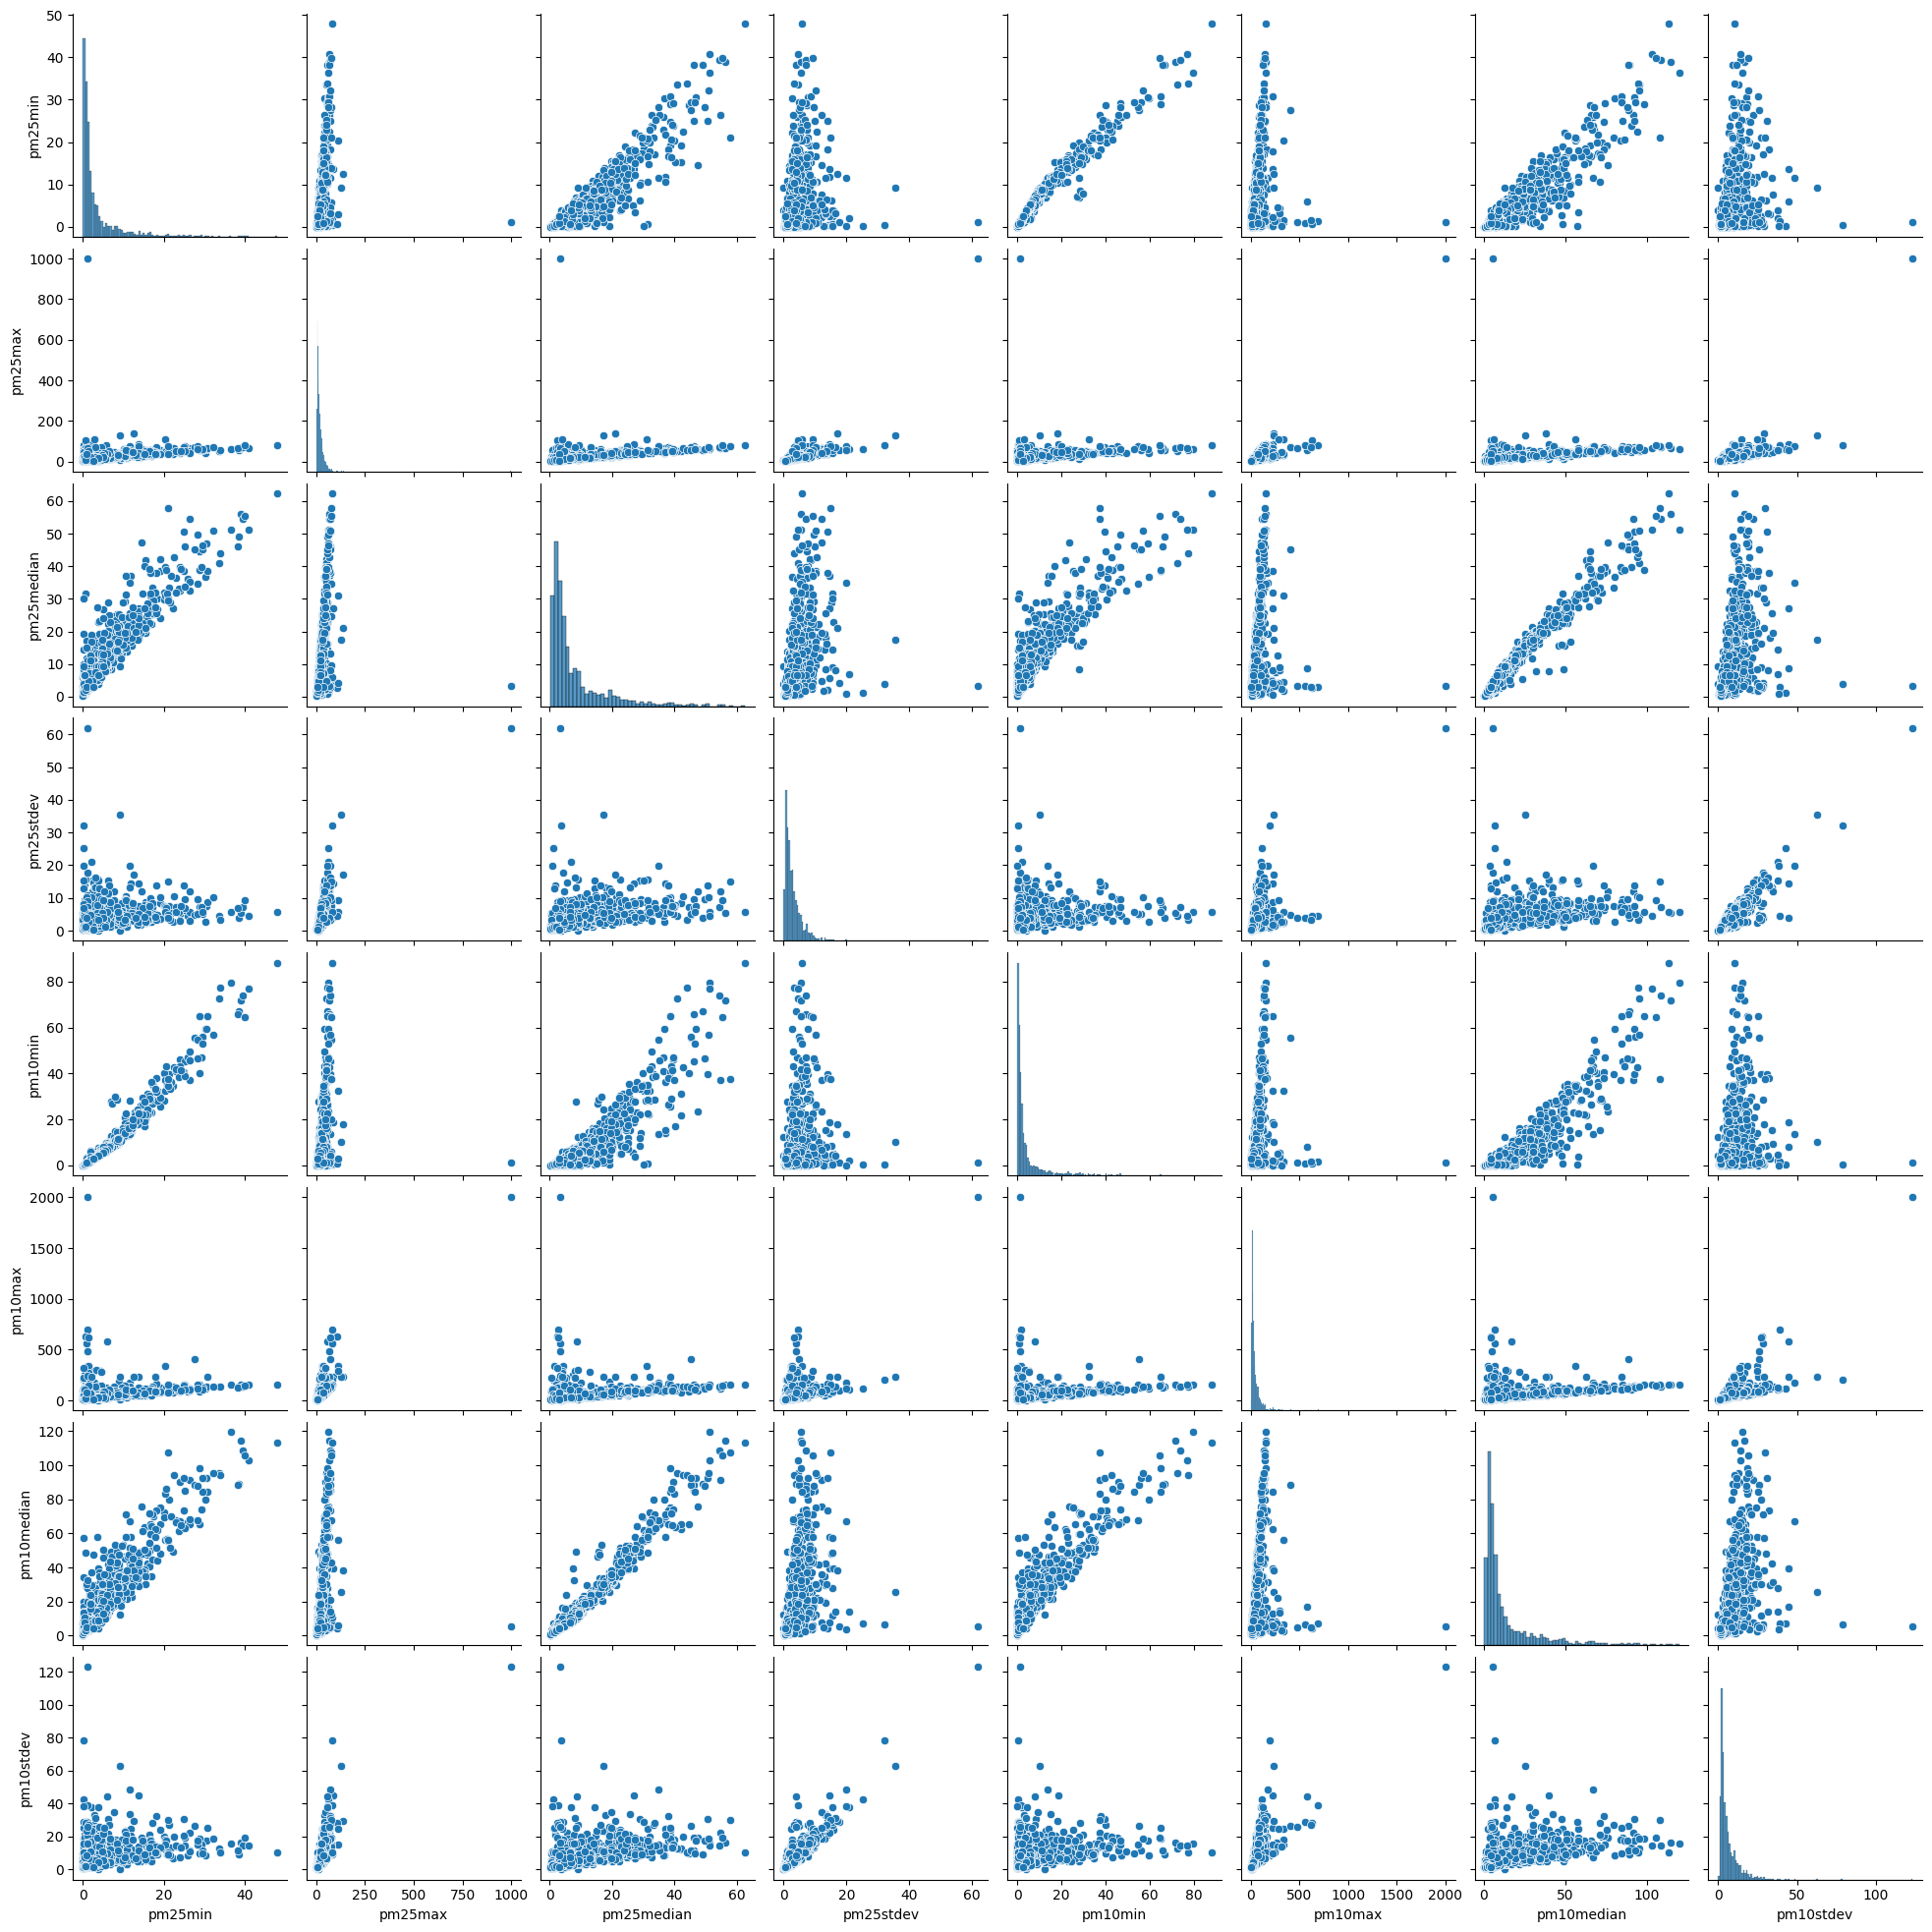

In [6]:
numerical_columns = ['pm25min', 'pm25max', 'pm25median', 'pm25stdev',  'pm10min', 'pm10max', 'pm10median',  'pm10stdev', ]

df_numerical = df_corsop[numerical_columns]

sns.pairplot(df_numerical)

plt.show()

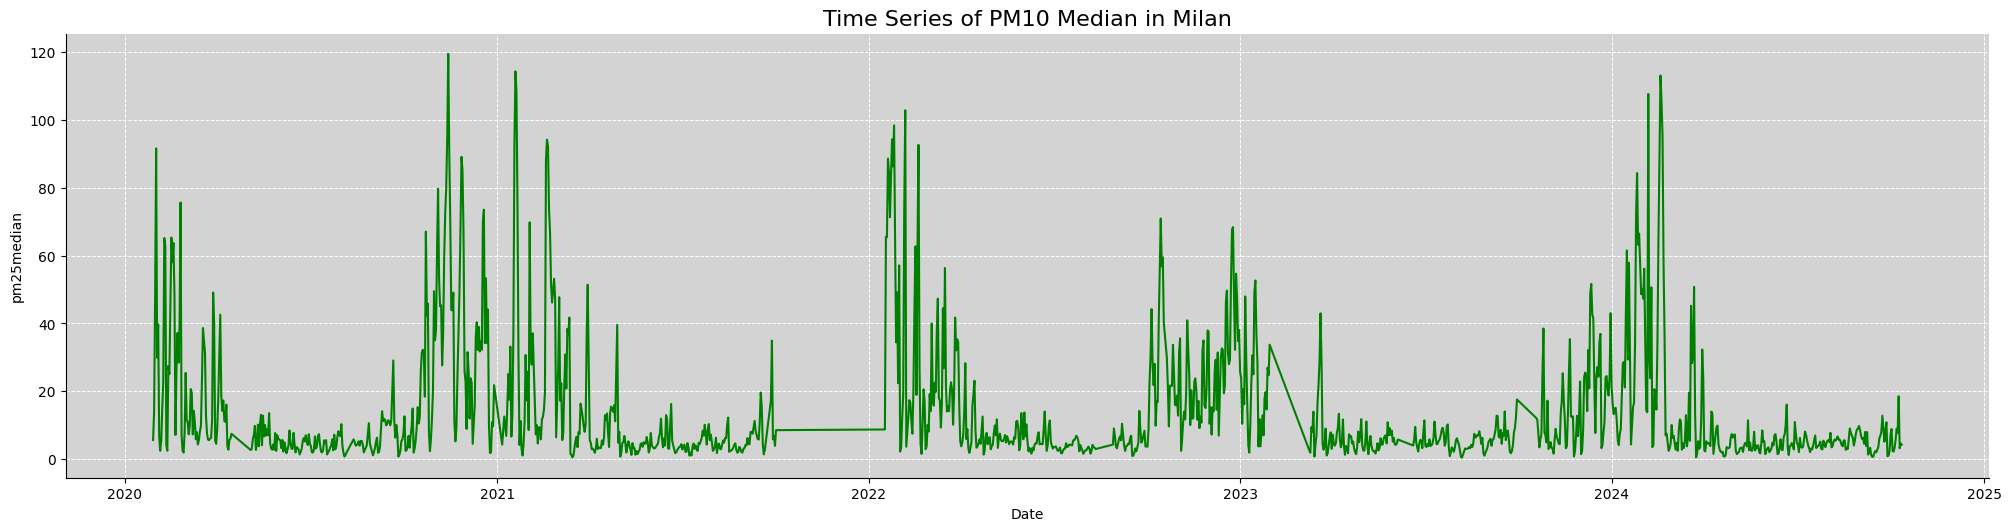

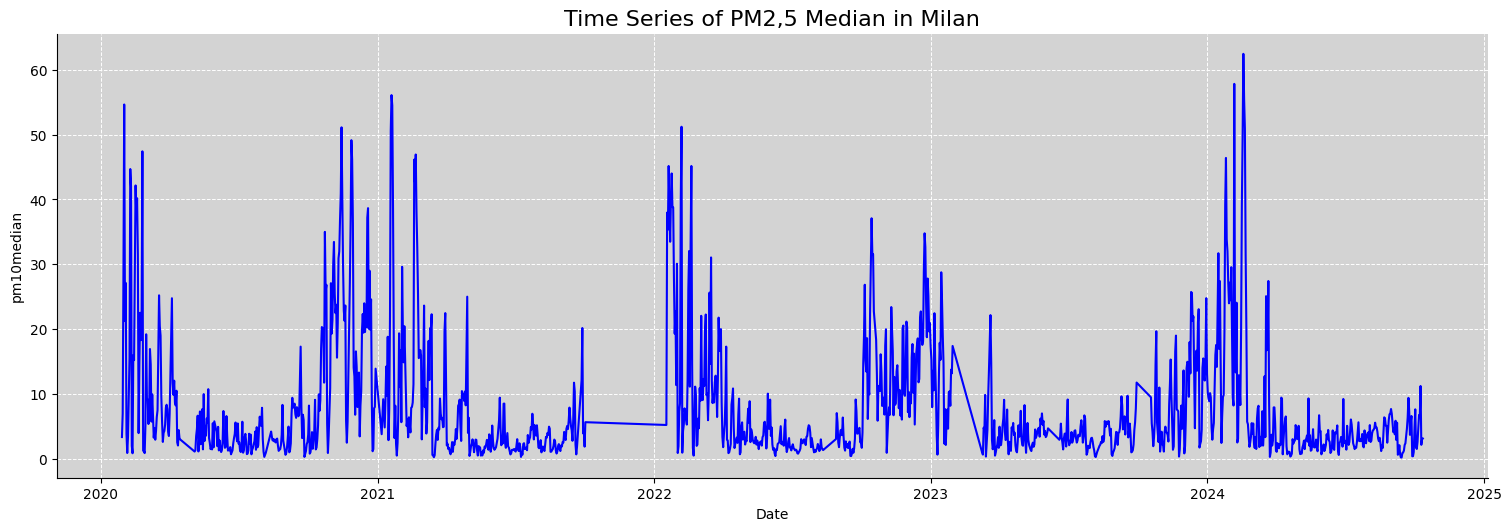

In [16]:


def _plot_series(series, series_name,colored ,variable,series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date']
    ys = series[variable]
    plt.plot(xs, ys, label=series_name, color=colored)


fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_corsop.sort_values('date', ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, '',"green",'pm10median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('pm25median')
plt.title('Time Series of PM10 Median in Milan', fontsize=16)
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.show()



fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = df_corsop.sort_values('date', ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, '', "blue",'pm25median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('pm10median')
plt.title('Time Series of PM2,5 Median in Milan', fontsize=16)
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.show()


<ipython-input-17-ba0a233553d0>:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


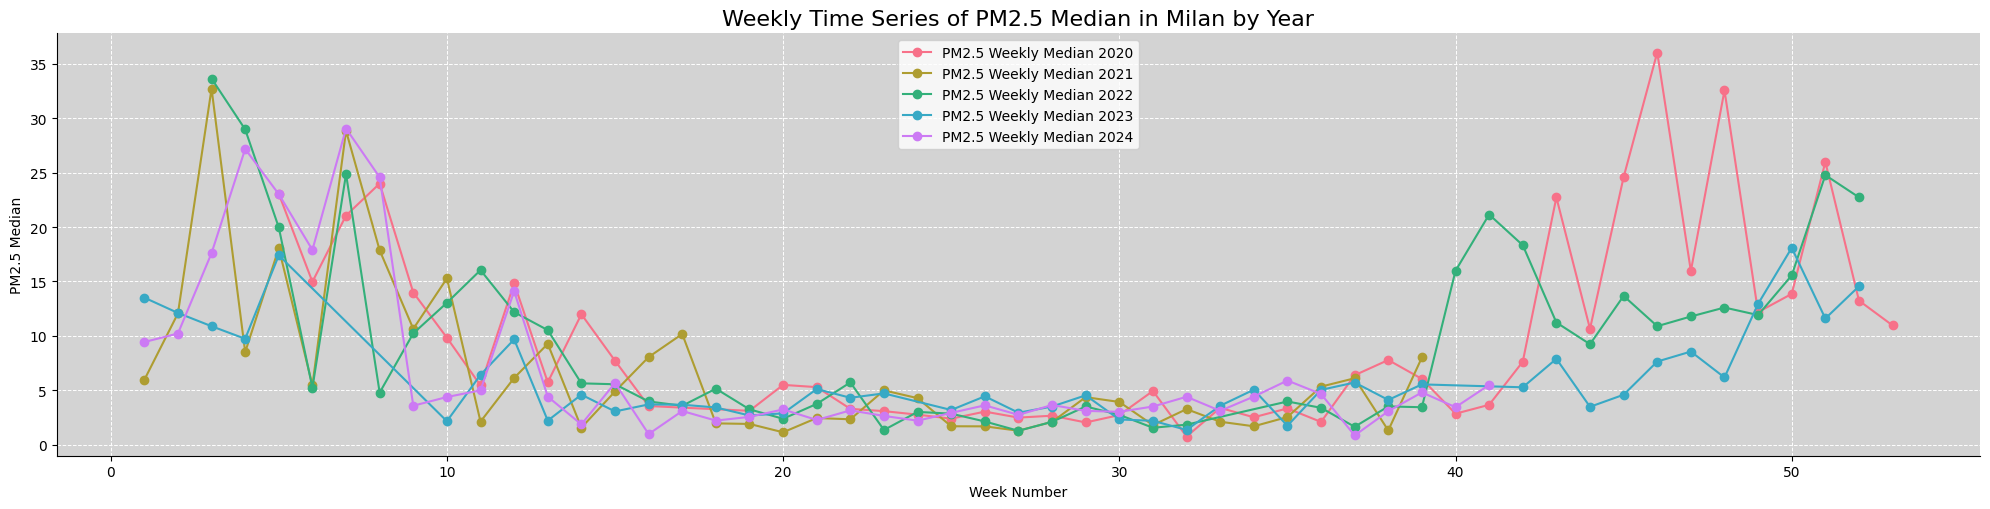

<ipython-input-17-ba0a233553d0>:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


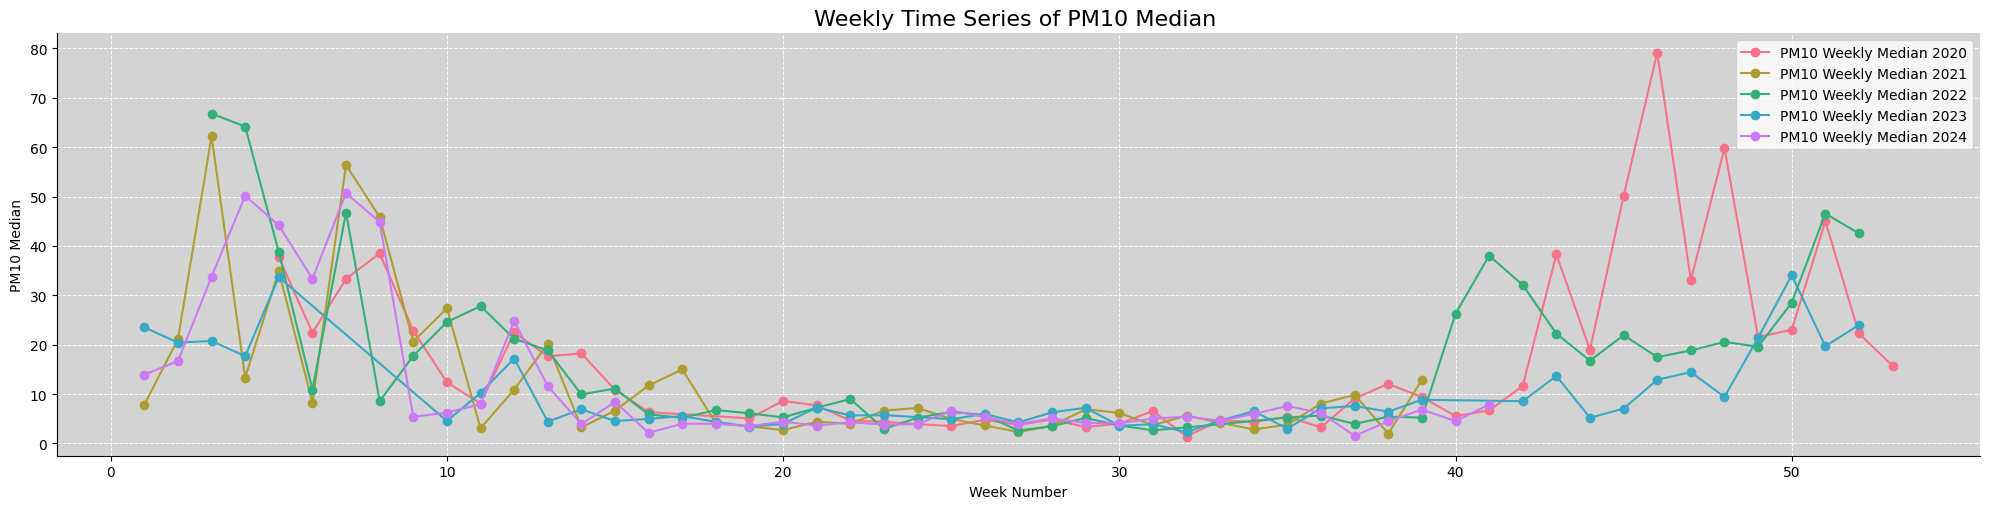

In [17]:

def _plot_series(series, series_name,measure):
    unique_years = series['year'].unique()
    palette = sns.color_palette('husl', len(unique_years))
    for i, year in enumerate(unique_years):
        yearly_data = series[series['year'] == year]
        xs = yearly_data['week_number']
        ys = yearly_data[measure]
        plt.plot(xs, ys, label=f'{series_name} {year}', color=palette[i], marker='o')

df_weekly = df_corsop.groupby(['year', 'week_number']).agg({'pm25median': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_weekly.sort_values(['year', 'week_number'], ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, 'PM2.5 Weekly Median','pm25median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week Number')
plt.ylabel('PM2.5 Median')
plt.title('Weekly Time Series of PM2.5 Median in Milan by Year', fontsize=16)
plt.legend()
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


df_weekly = df_corsop.groupby(['year', 'week_number']).agg({'pm10median': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_weekly.sort_values(['year', 'week_number'], ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, 'PM10 Weekly Median','pm10median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week Number')
plt.ylabel('PM10 Median')
plt.title('Weekly Time Series of PM10 Median ', fontsize=16)
plt.legend()
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


Slope (Coefficient): 0.5098074158152162
Intercept: 0.8670960271748553
R^2: 0.96603960322158


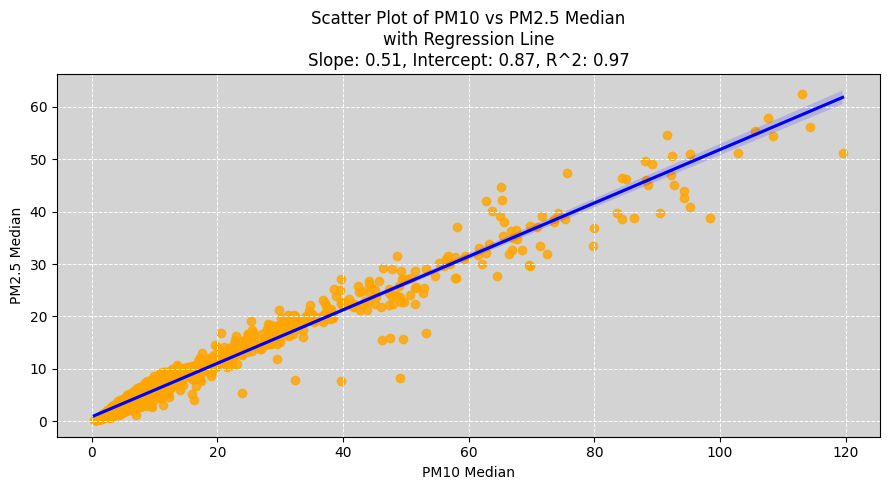

In [18]:

X = df_corsop[['pm10median']].values.reshape(-1, 1)
y = df_corsop['pm25median'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

r_squared = model.score(X, y)

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R^2: {r_squared}")


plt.figure(figsize=(9, 5))
ax = plt.gca()
ax.set_facecolor('lightgray')
sns.regplot(x='pm10median', y='pm25median', data=df_corsop, scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'}, ax=ax)
plt.xlabel('PM10 Median')
plt.ylabel('PM2.5 Median')
plt.title(f'Scatter Plot of PM10 vs PM2.5 Median\nwith Regression Line\nSlope: {slope:.2f}, Intercept: {intercept:.2f}, R^2: {r_squared:.2f}')
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


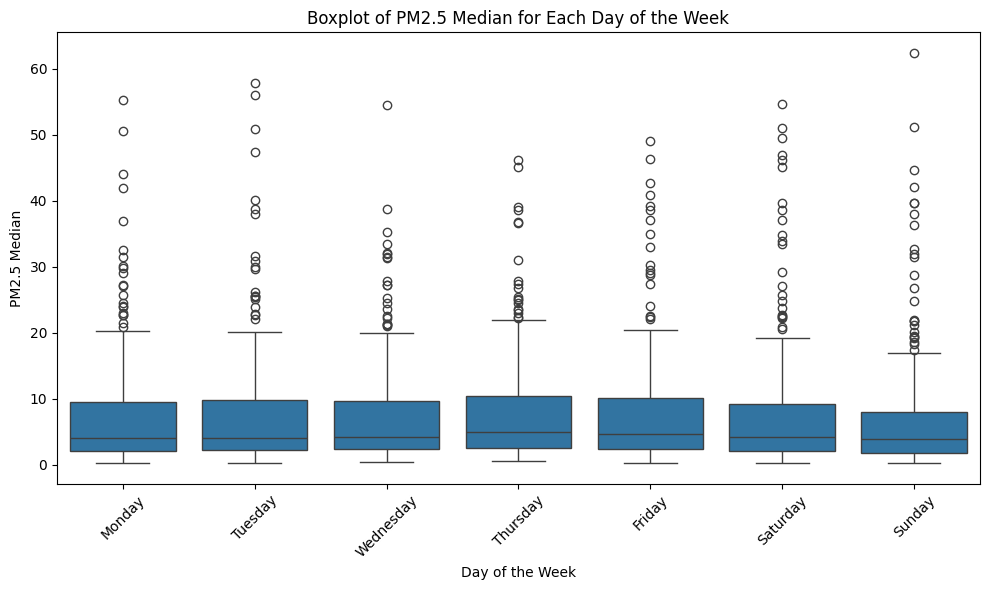

In [19]:

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df_corsop['day_of_week'] = pd.Categorical(df_corsop['day_of_week'], categories=days_order, ordered=True)


plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='pm25median', data=df_corsop)


plt.xlabel('Day of the Week')
plt.ylabel('PM2.5 Median')
plt.title('Boxplot of PM2.5 Median for Each Day of the Week')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


<ipython-input-20-fd1095bf1d9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.Categorical(df_filtered['day_of_week'], categories=days_order, ordered=True)


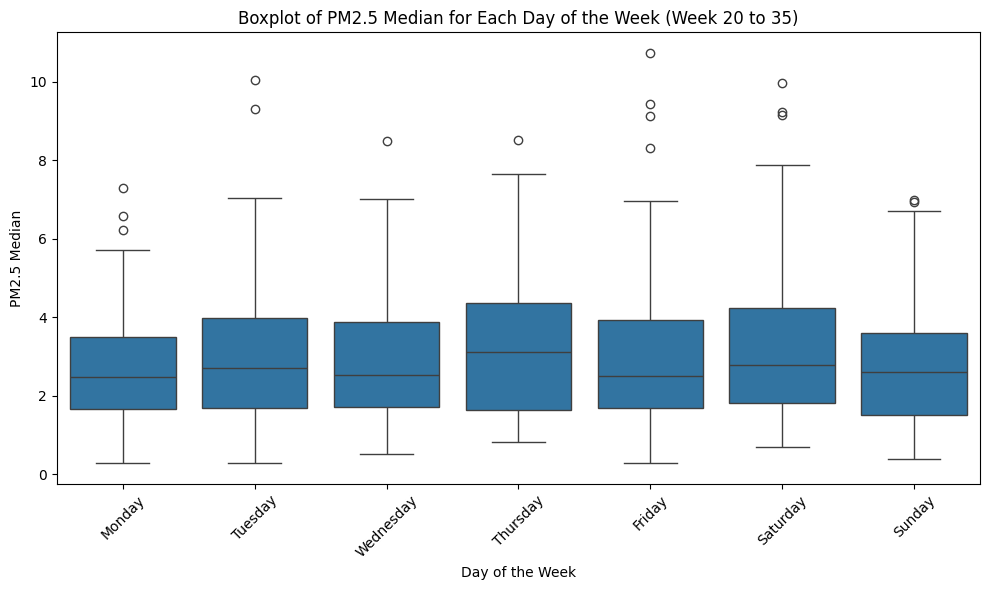

In [20]:
# week 20 to 35
df_filtered = df_corsop[(df_corsop['week_number'] >= 20) & (df_corsop['week_number'] <= 35)]

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_filtered['day_of_week'] = pd.Categorical(df_filtered['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='pm25median', data=df_filtered)

plt.xlabel('Day of the Week')
plt.ylabel('PM2.5 Median')
plt.title('Boxplot of PM2.5 Median for Each Day of the Week (Week 20 to 35)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Sempione


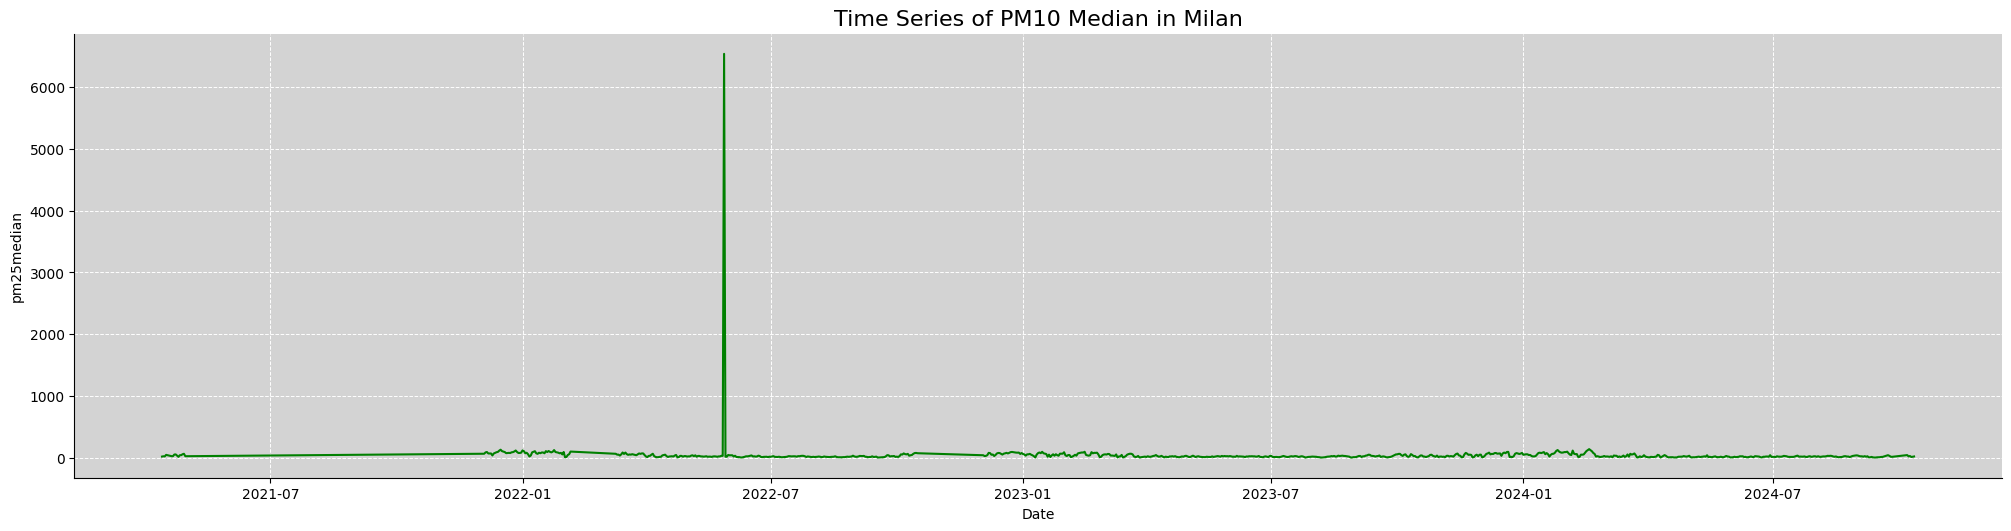

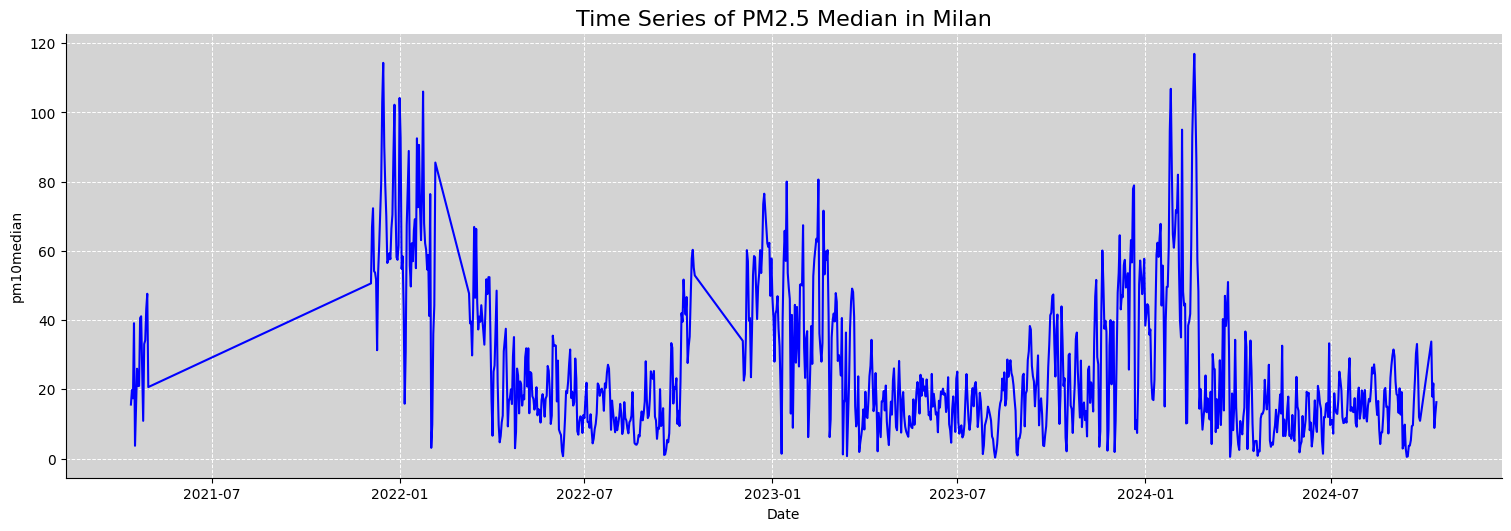

In [21]:

def _plot_series(series, series_name,colored ,variable,series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date']
    ys = series[variable]
    plt.plot(xs, ys, label=series_name, color=colored)


fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_sempione.sort_values('date', ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, '',"green",'pm10median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('pm25median')
plt.title('Time Series of PM10 Median in Milan', fontsize=16)
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.show()



fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = df_sempione.sort_values('date', ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, '', "blue",'pm25median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('pm10median')
plt.title('Time Series of PM2.5 Median in Milan', fontsize=16)
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.show()


<ipython-input-22-e84e501a7200>:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


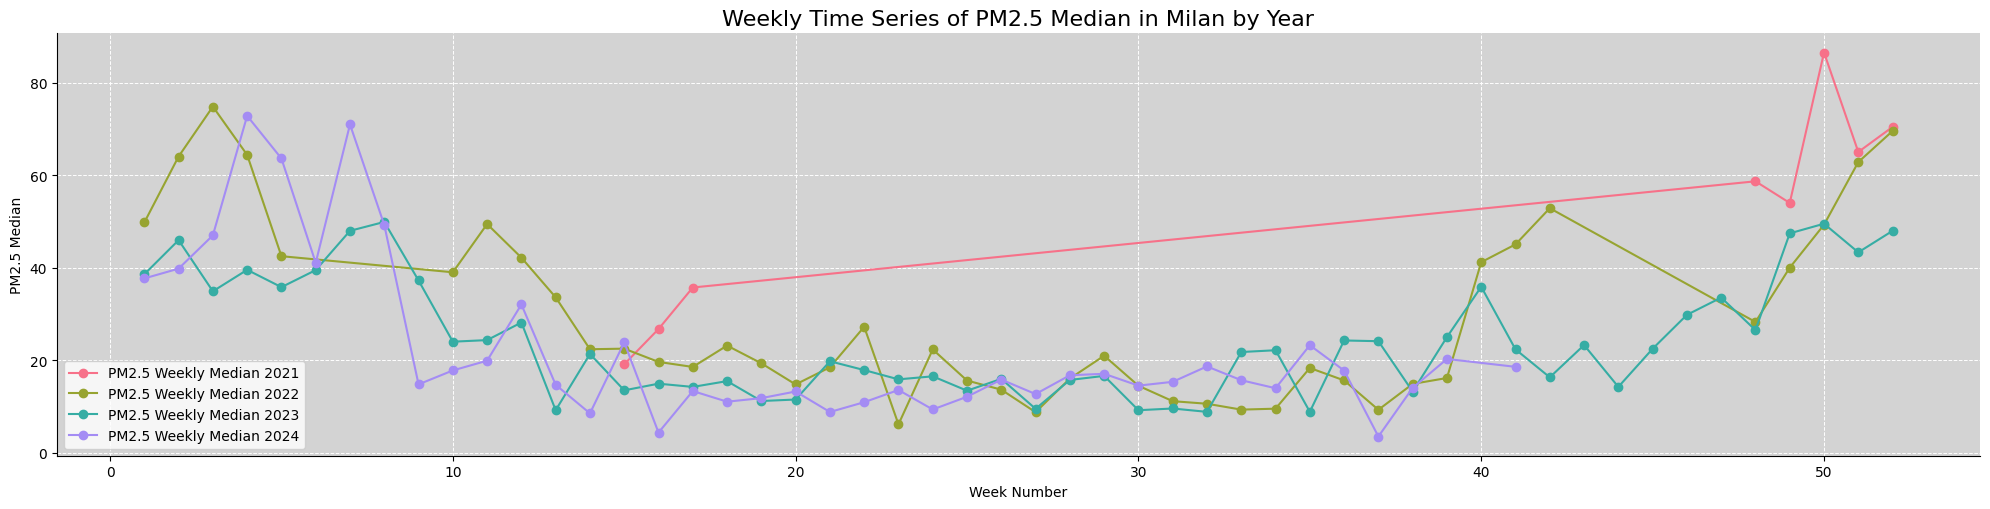

<ipython-input-22-e84e501a7200>:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


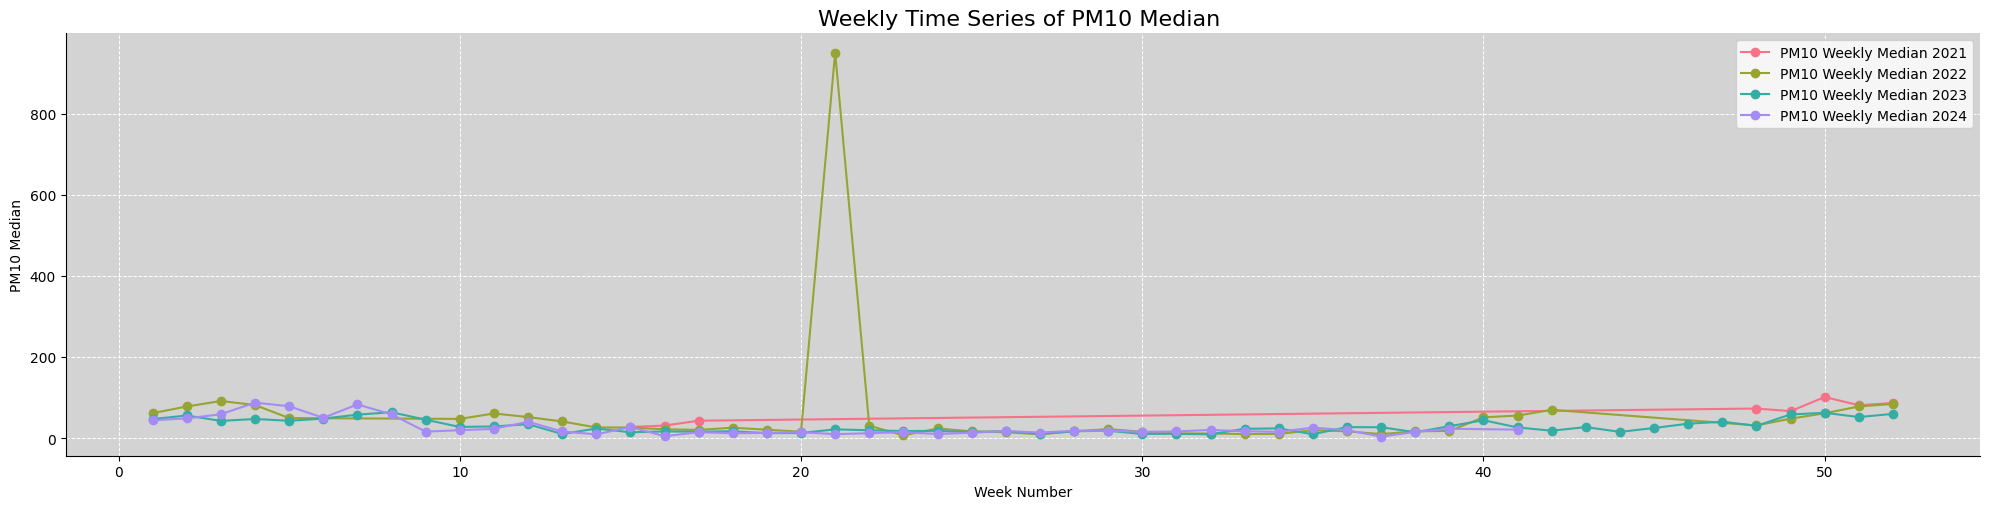

In [22]:

def _plot_series(series, series_name,measure):
    unique_years = series['year'].unique()
    palette = sns.color_palette('husl', len(unique_years))
    for i, year in enumerate(unique_years):
        yearly_data = series[series['year'] == year]
        xs = yearly_data['week_number']
        ys = yearly_data[measure]
        plt.plot(xs, ys, label=f'{series_name} {year}', color=palette[i], marker='o')
df_weekly = df_sempione.groupby(['year', 'week_number']).agg({'pm25median': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_weekly.sort_values(['year', 'week_number'], ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, 'PM2.5 Weekly Median','pm25median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week Number')
plt.ylabel('PM2.5 Median')
plt.title('Weekly Time Series of PM2.5 Median in Milan by Year', fontsize=16)
plt.legend()
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

def _plot_series(series, series_name,measure):
    unique_years = series['year'].unique()
    palette = sns.color_palette('husl', len(unique_years))
    for i, year in enumerate(unique_years):
        yearly_data = series[series['year'] == year]
        xs = yearly_data['week_number']
        ys = yearly_data[measure]
        plt.plot(xs, ys, label=f'{series_name} {year}', color=palette[i], marker='o')
df_weekly = df_sempione.groupby(['year', 'week_number']).agg({'pm10median': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize=(20, 5.2), layout='constrained')
df_sorted = df_weekly.sort_values(['year', 'week_number'], ascending=True)
ax.set_facecolor('lightgray')
_plot_series(df_sorted, 'PM10 Weekly Median','pm10median')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week Number')
plt.ylabel('PM10 Median')
plt.title('Weekly Time Series of PM10 Median ', fontsize=16)
plt.legend()
ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#outlier date
max_pm10_median_row = df_sempione.loc[df_sempione['pm10median'].idxmax()]
print(max_pm10_median_row[['date', 'pm10median']])

#No news that date so ir will be considered a malfunction
max_pm10_median_idx = df_sempione['pm10median'].idxmax()
df_sempione = df_sempione.drop(index=max_pm10_median_idx)

date          2022-05-28 00:00:00+00:00
pm10median                       6540.0
Name: 157, dtype: object


# cosine similarity
diferent components behave the same, every year there is a clearly marked pattern


In [23]:

def get_weekly_data(df, measure):
    return df.groupby(['year', 'week_number']).agg({measure: 'mean'}).reset_index()

# Function to calculate cosine similarity between two FFT vectors
def calculate_cosine_similarity(series_1, series_2):
    fft_1 = np.fft.fft(series_1)
    fft_2 = np.fft.fft(series_2)
    cos_sim = cosine_similarity([np.abs(fft_1)], [np.abs(fft_2)])
    return cos_sim[0][0]

df_weekly_pm10 = get_weekly_data(df_sempione, 'pm10median')

df_2022 = df_weekly_pm10[df_weekly_pm10['year'] == 2022]
df_2023 = df_weekly_pm10[df_weekly_pm10['year'] == 2023]


df_merged = pd.merge(df_2022, df_2023, on='week_number', suffixes=('_2022', '_2023'))

cosine_sim = calculate_cosine_similarity(df_merged['pm10median_2022'], df_merged['pm10median_2023'])
cosine_sim


0.6260971124635886

##Cosine Similarity between stations weekly average
Conclusion they are similar enough

In [ ]:
#weekly average
df_weekly_pm10_sempione = get_weekly_data(df_sempione, 'pm10median')
df_weekly_pm10_corsop= get_weekly_data(df_corsop, 'pm10median')

df_2023_sempione = df_weekly_pm10[df_weekly_pm10_sempione['year'] == 2023]
df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2023]
df_merged = pd.merge(df_2023_corsop, df_2023_sempione, on='week_number', suffixes=('_2022', '_2023'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_2022'], df_merged['pm10median_2023'])
print("Cosine distance between stations corsop and sempione 2023",cosine_sim)

df_2023_sempione = df_weekly_pm10[df_weekly_pm10_sempione['year'] == 2022]
df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2022]
df_merged = pd.merge(df_2023_corsop, df_2023_sempione, on='week_number', suffixes=('_2022', '_2023'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_2022'], df_merged['pm10median_2023'])
print("Cosine distance between stations corsop and sempione 2022",cosine_sim)

df_2023_sempione = df_weekly_pm10[df_weekly_pm10_sempione['year'] == 2021]
df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2021]
df_merged = pd.merge(df_2023_corsop, df_2023_sempione, on='week_number', suffixes=('_2022', '_2023'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_2022'], df_merged['pm10median_2023'])
print("Cosine distance between stations corsop and sempione 2021",cosine_sim)

Cosine distance between stations corsop and sempione 2023 0.9648343025751293
Cosine distance between stations corsop and sempione 2022 0.9778479065687549
Cosine distance between stations corsop and sempione 2021 0.9853426408772109


<ipython-input-32-955f1f016fd4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2023]
<ipython-input-32-955f1f016fd4>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2022]
<ipython-input-32-955f1f016fd4>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023_corsop = df_weekly_pm10[df_weekly_pm10_corsop['year'] == 2021]


In [ ]:
#weekly average

df_2023_sempione = df_sempione[df_sempione['year'] == 2023]
df_2023_corsop = df_corsop[df_corsop['year'] == 2023]

df_merged = pd.merge(df_2023_corsop, df_2023_sempione, on='week_number', suffixes=('_corsop', '_sempione'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_corsop'], df_merged['pm10median_sempione'])
print("Cosine similarity between stations corsop and sempione for 2023:", cosine_sim)

df_2022_sempione = df_sempione[df_sempione['year'] == 2022]
df_2022_corsop = df_corsop[df_corsop['year'] == 2022]
df_merged = pd.merge(df_2022_corsop, df_2022_sempione, on='week_number', suffixes=('_corsop', '_sempione'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_corsop'], df_merged['pm10median_sempione'])
print("Cosine similarity between stations corsop and sempione for 2022:", cosine_sim)

df_2021_sempione = df_sempione[df_sempione['year'] == 2021]
df_2021_corsop = df_corsop[df_corsop['year'] == 2021]
df_merged = pd.merge(df_2021_corsop, df_2021_sempione, on='week_number', suffixes=('_corsop', '_sempione'))
cosine_sim = calculate_cosine_similarity(df_merged['pm10median_corsop'], df_merged['pm10median_sempione'])
print("Cosine similarity between stations corsop and sempione for 2021:", cosine_sim)


Cosine similarity between stations corsop and sempione for 2023: 0.8498897946068071
Cosine similarity between stations corsop and sempione for 2022: 0.8953692247872086
Cosine similarity between stations corsop and sempione for 2021: 0.8533353721480439
